# Example 7.10: Exact intervals for quantiles

This notebook replicates the R code for generating normal and lognormal samples and calculating confidence intervals for quantiles.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm

In [7]:
# Initialize matrices
resmat = np.zeros((4, 100))
samples = np.zeros((2, 200))

# Generate samples and calculate quantiles
for i in range(100):
    samples[0, :] = -np.sort(-np.random.normal(size=200))  # Normal samples in decreasing order
    samples[1, :] = -np.sort(-np.random.lognormal(size=200))  # Lognormal samples in decreasing order

    # Extract quantiles for normal samples
    resmat[0, i] = samples[0, 16]  # 17th largest
    resmat[1, i] = samples[0, 4]   # 5th largest

    # Extract quantiles for lognormal samples
    resmat[2, i] = samples[1, 16]  # 17th largest
    resmat[3, i] = samples[1, 4]   # 5th largest

resmat

array([[ 1.32300534,  1.48752069,  1.42826253,  1.45378616,  1.33674783,
         1.34112772,  1.18642992,  1.43521399,  1.43097051,  1.27445901,
         1.33850192,  1.30452483,  1.33767721,  1.2800568 ,  1.50498899,
         1.68986298,  1.70512521,  1.29684021,  1.33365948,  1.34823271,
         1.42794492,  1.38863351,  1.48790288,  1.37200292,  1.42816638,
         1.45958224,  1.33671652,  1.47030603,  1.05170667,  1.32649189,
         1.4475898 ,  1.34666213,  1.28307355,  1.35813182,  1.2858537 ,
         1.43264508,  1.58978989,  1.43304532,  1.66310269,  1.34528164,
         1.45101707,  1.26404817,  1.3441382 ,  1.51393846,  1.32724889,
         1.32429914,  1.43293054,  1.35232479,  1.27715816,  1.68533525,
         1.41764172,  1.3056353 ,  1.36015324,  1.31151092,  1.36437169,
         1.44285606,  1.43050049,  1.27521587,  1.45687577,  1.5817809 ,
         1.2451725 ,  1.24325669,  1.30797185,  1.43921764,  1.39985123,
         1.3529652 ,  1.28390368,  1.43568497,  1.3

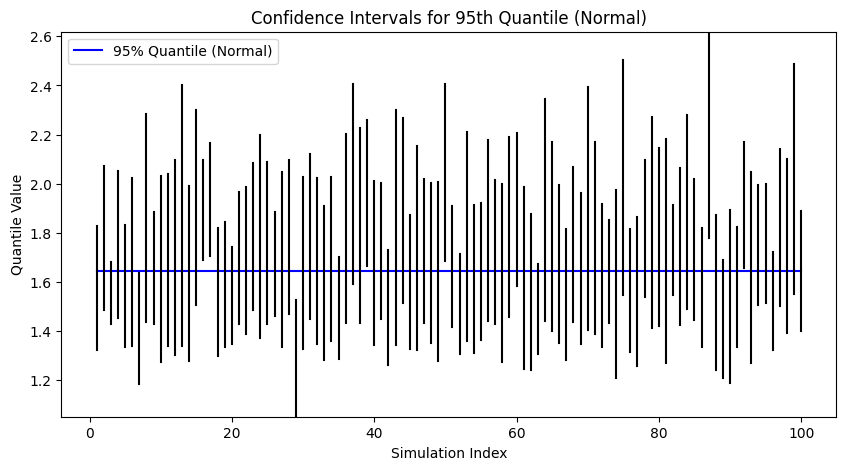

In [8]:
# Plot confidence intervals for normal samples
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), [norm.ppf(0.95)] * 100, 'b-', label='95% Quantile (Normal)')
for i in range(100):
    plt.plot([i+1, i+1], [resmat[0, i], resmat[1, i]], 'k-')

plt.ylim(np.min(resmat[0, :]), np.max(resmat[1, :]))
plt.xlabel('Simulation Index')
plt.ylabel('Quantile Value')
plt.title('Confidence Intervals for 95th Quantile (Normal)')
plt.legend()
plt.show()

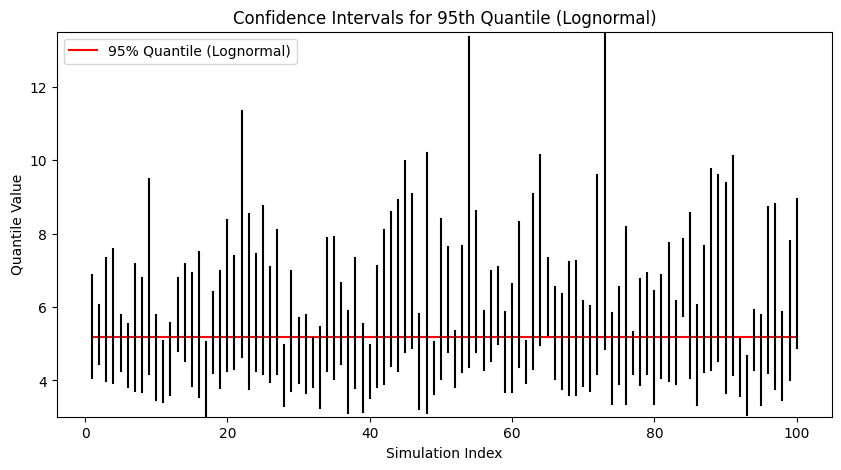

In [9]:
# Plot confidence intervals for lognormal samples
plt.figure(figsize=(10, 5))
plt.plot(range(1, 101), [lognorm.ppf(0.95, s=1)] * 100, 'r-', label='95% Quantile (Lognormal)')
for i in range(100):
    plt.plot([i+1, i+1], [resmat[2, i], resmat[3, i]], 'k-')

plt.ylim(np.min(resmat[2, :]), np.max(resmat[3, :]))
plt.xlabel('Simulation Index')
plt.ylabel('Quantile Value')
plt.title('Confidence Intervals for 95th Quantile (Lognormal)')
plt.legend()
plt.show()